In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from configs import load_config

In [7]:
config_path = "./configs/config.yml"
run_ids = ["1W", "2W", "3W", "4W", "5W", "10W"]

In [8]:
config = load_config(config_path)
cwd = os.getcwd()

outputs_dir = os.path.join(cwd, "outputs/fig")
os.makedirs("./outputs/fig", exist_ok=True)

instance_id = config.get("instance_id")
# Create paths for dataframes
paths = [os.path.join(cwd, "outputs", "parquet", "metrics-" + id + "-" + instance_id + ".parquet") for id in run_ids]
# Load dataframe
dfs = [pd.read_parquet(path) for path in paths]
metrics = dfs[0].columns

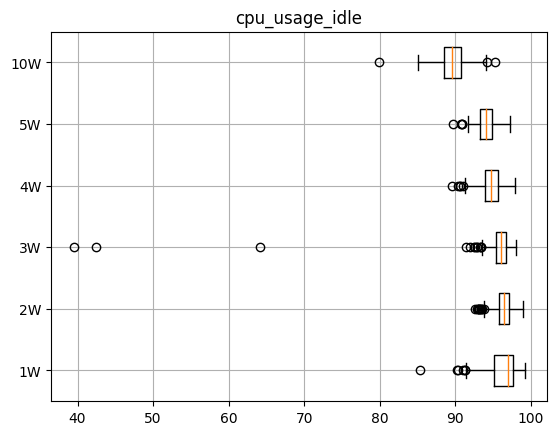

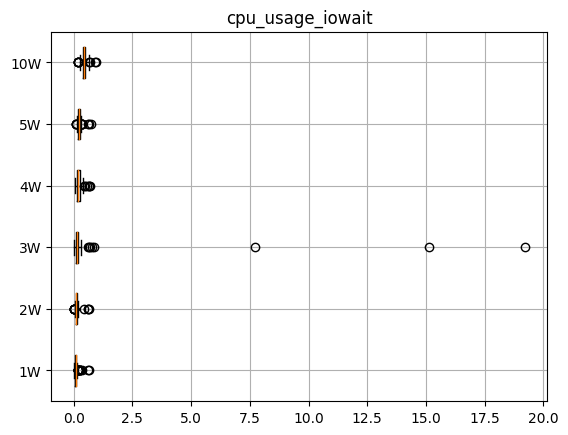

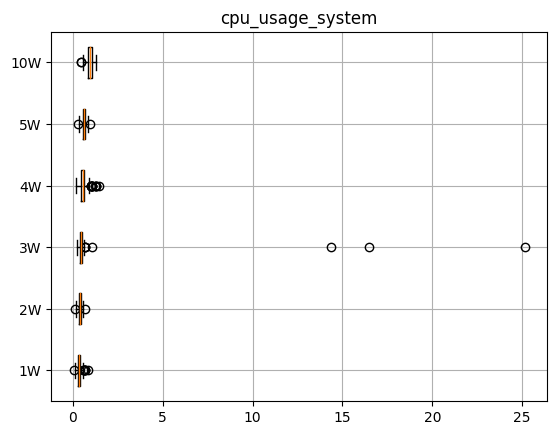

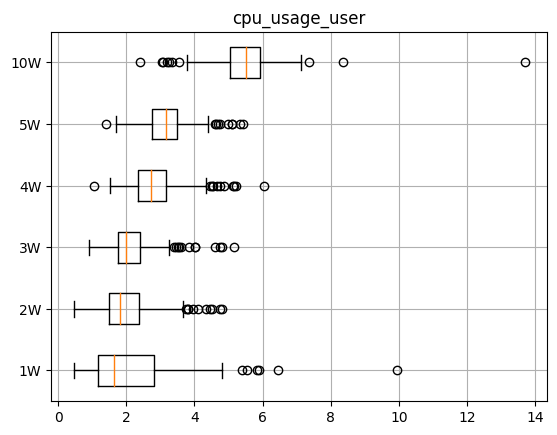

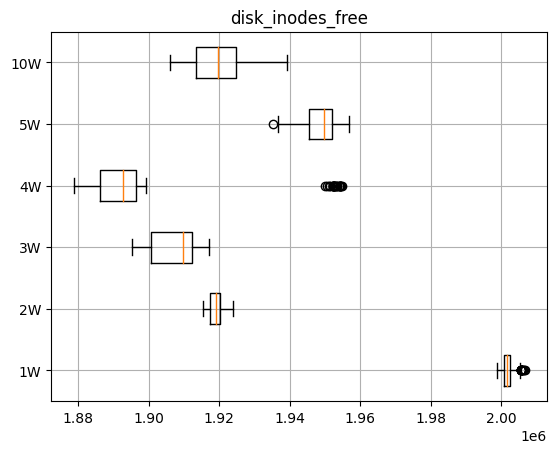

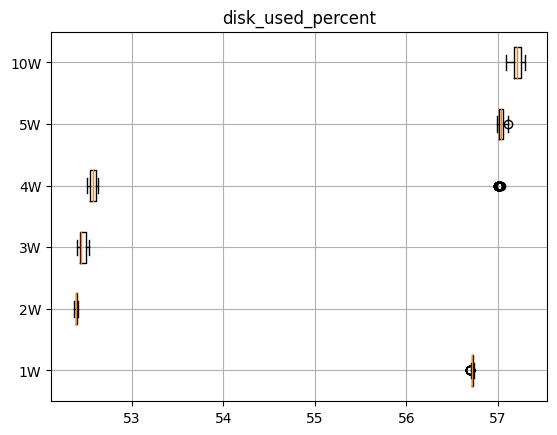

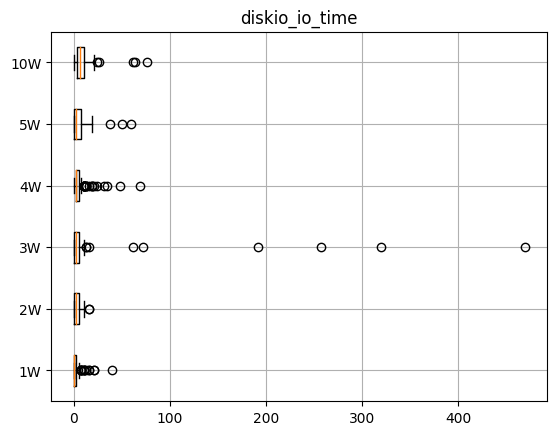

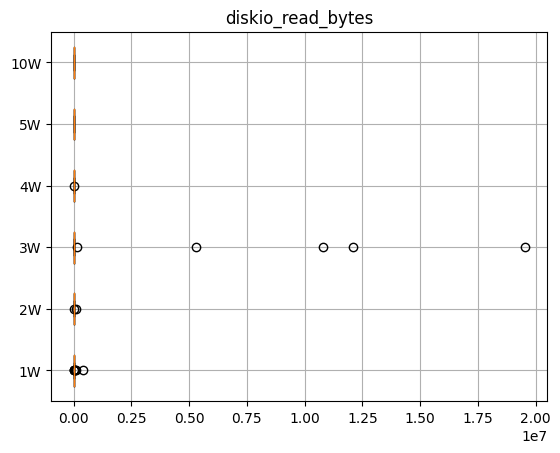

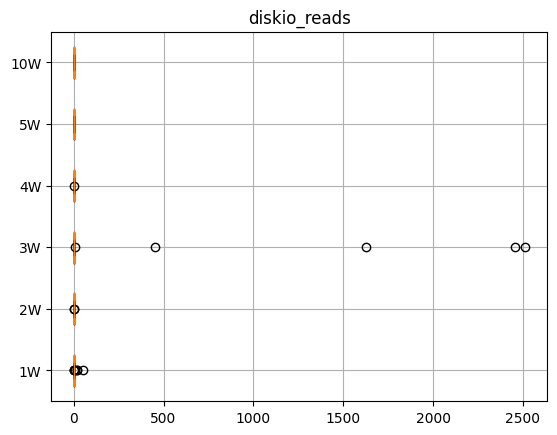

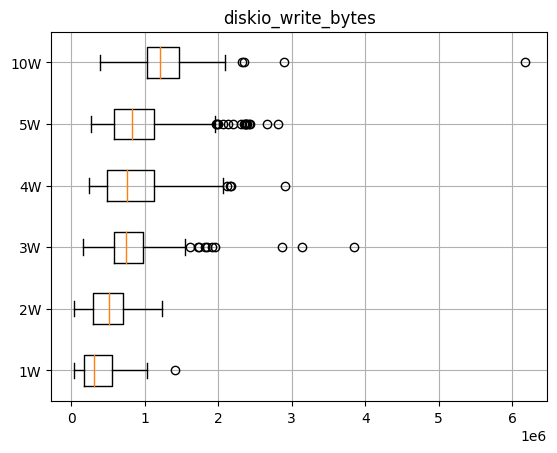

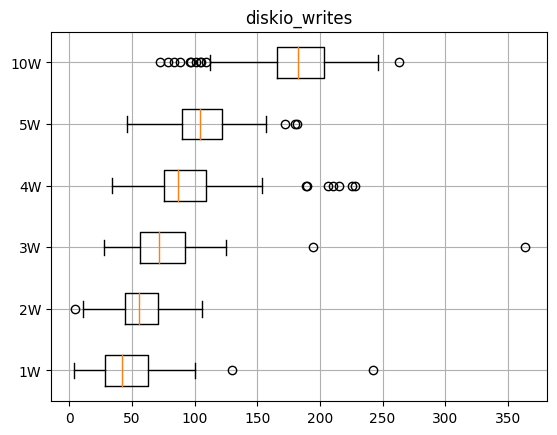

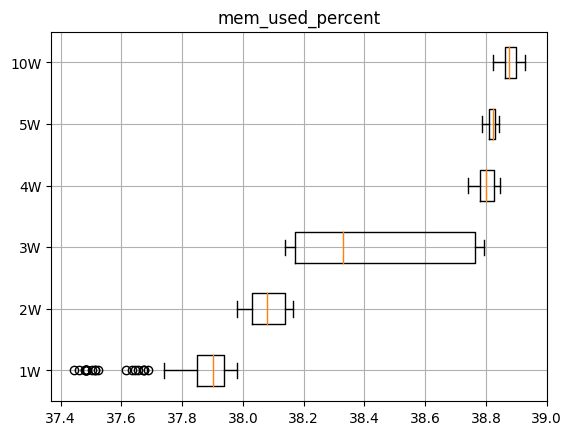

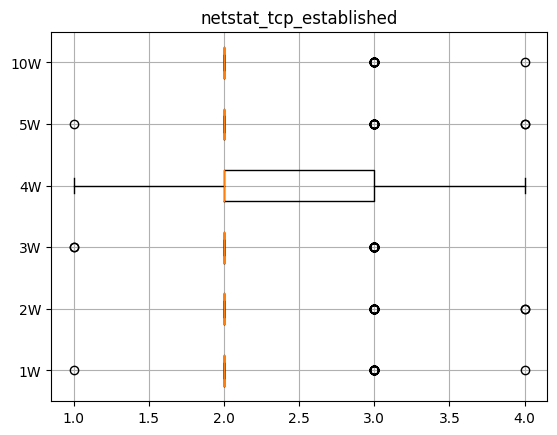

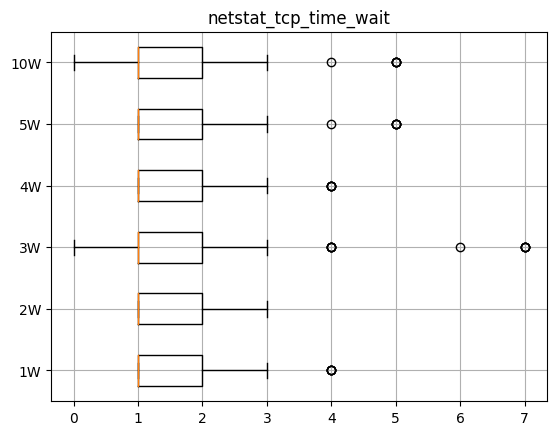

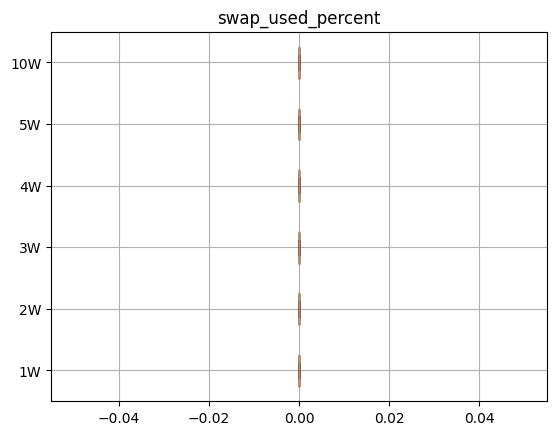

In [14]:
for metric in metrics:
    data = []
    for df in dfs:
        data.append(df[metric])
    plt.boxplot(data, vert=False, labels=run_ids)
    plt.title(f'{metric}')
    plt.grid()
    plt.savefig(os.path.join(outputs_dir, f'{metric}.png'), dpi=300, bbox_inches='tight')
    plt.show()